## Breast Cancer Campaign

In [34]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sbn

import optuna
from sklearn.model_selection import train_test_split ## split data

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

import seaborn as sns


In [4]:
## load data
data = pd.read_csv("../../Module2_IntroToML/MiniProjects/BreastCancer/data.csv")
df = pd.read_csv("data_refined.csv")
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.394785,0.260601,0.379605,0.270379,0.189324,0.181119,0.178143,0.263307
std,0.483918,0.166787,0.145453,0.126967,0.161992,0.138456,0.148702,0.121917,0.102067,0.116316,0.121954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.304595,0.139685,0.282323,0.163016,0.104690,0.117483,0.102409,0.185098
50%,0.000000,0.302381,0.308759,0.390358,0.224679,0.369697,0.243892,0.165267,0.158650,0.152643,0.247782
75%,1.000000,0.416442,0.408860,0.475490,0.340531,0.453030,0.340354,0.246155,0.218683,0.219480,0.318155
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
## Feature Selection
df
## Diagnosed column [conaining M: Malignant Tumor, B: Benign Tumor] has been previously encoded into 0 and 1


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.120469,0.159296,0.311645,0.598462
1,1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.082589,0.119387,0.084539,0.233590
2,1,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.094303,0.150831,0.205690,0.403706
3,1,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.175875,0.251453,0.728148,1.000000
4,1,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.093065,0.332359,0.136179,0.157500
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.197976,0.291906,0.045843,0.097575
565,1,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.464728,0.137879,0.156160,0.198502
566,1,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.157974,0.142435,0.074548,0.128721
567,1,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.272896,0.163477,0.216103,0.497142


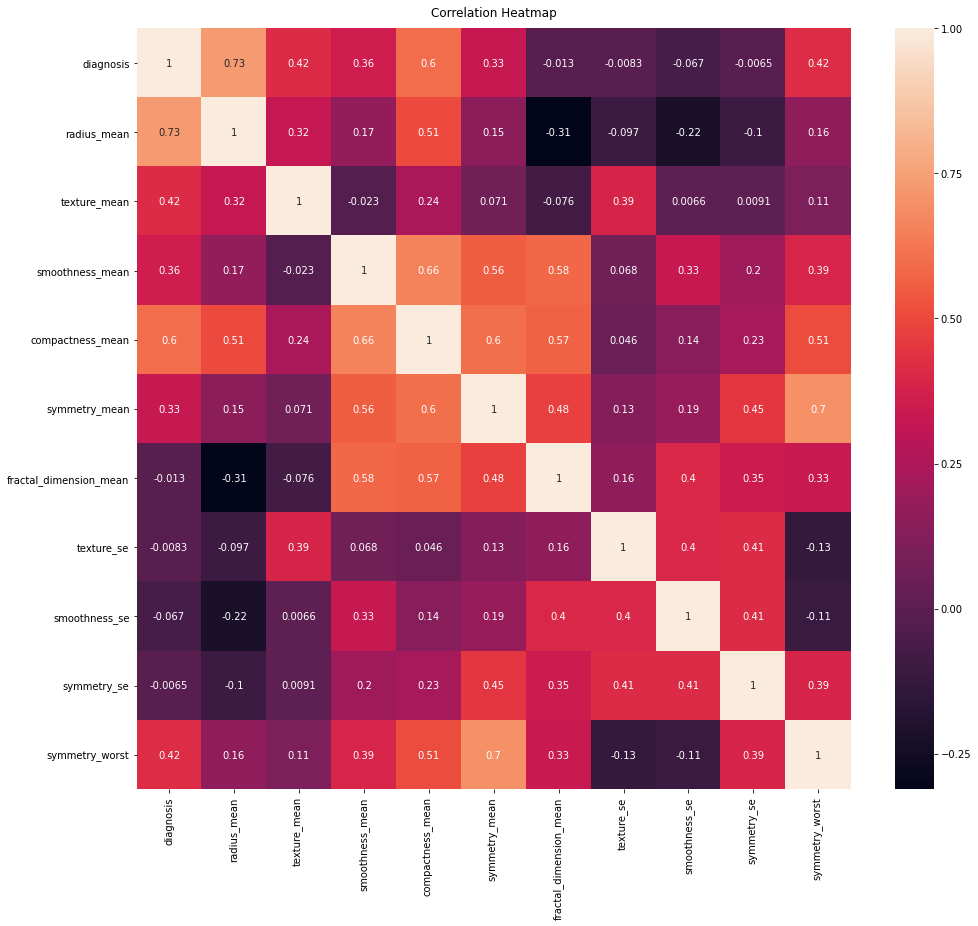

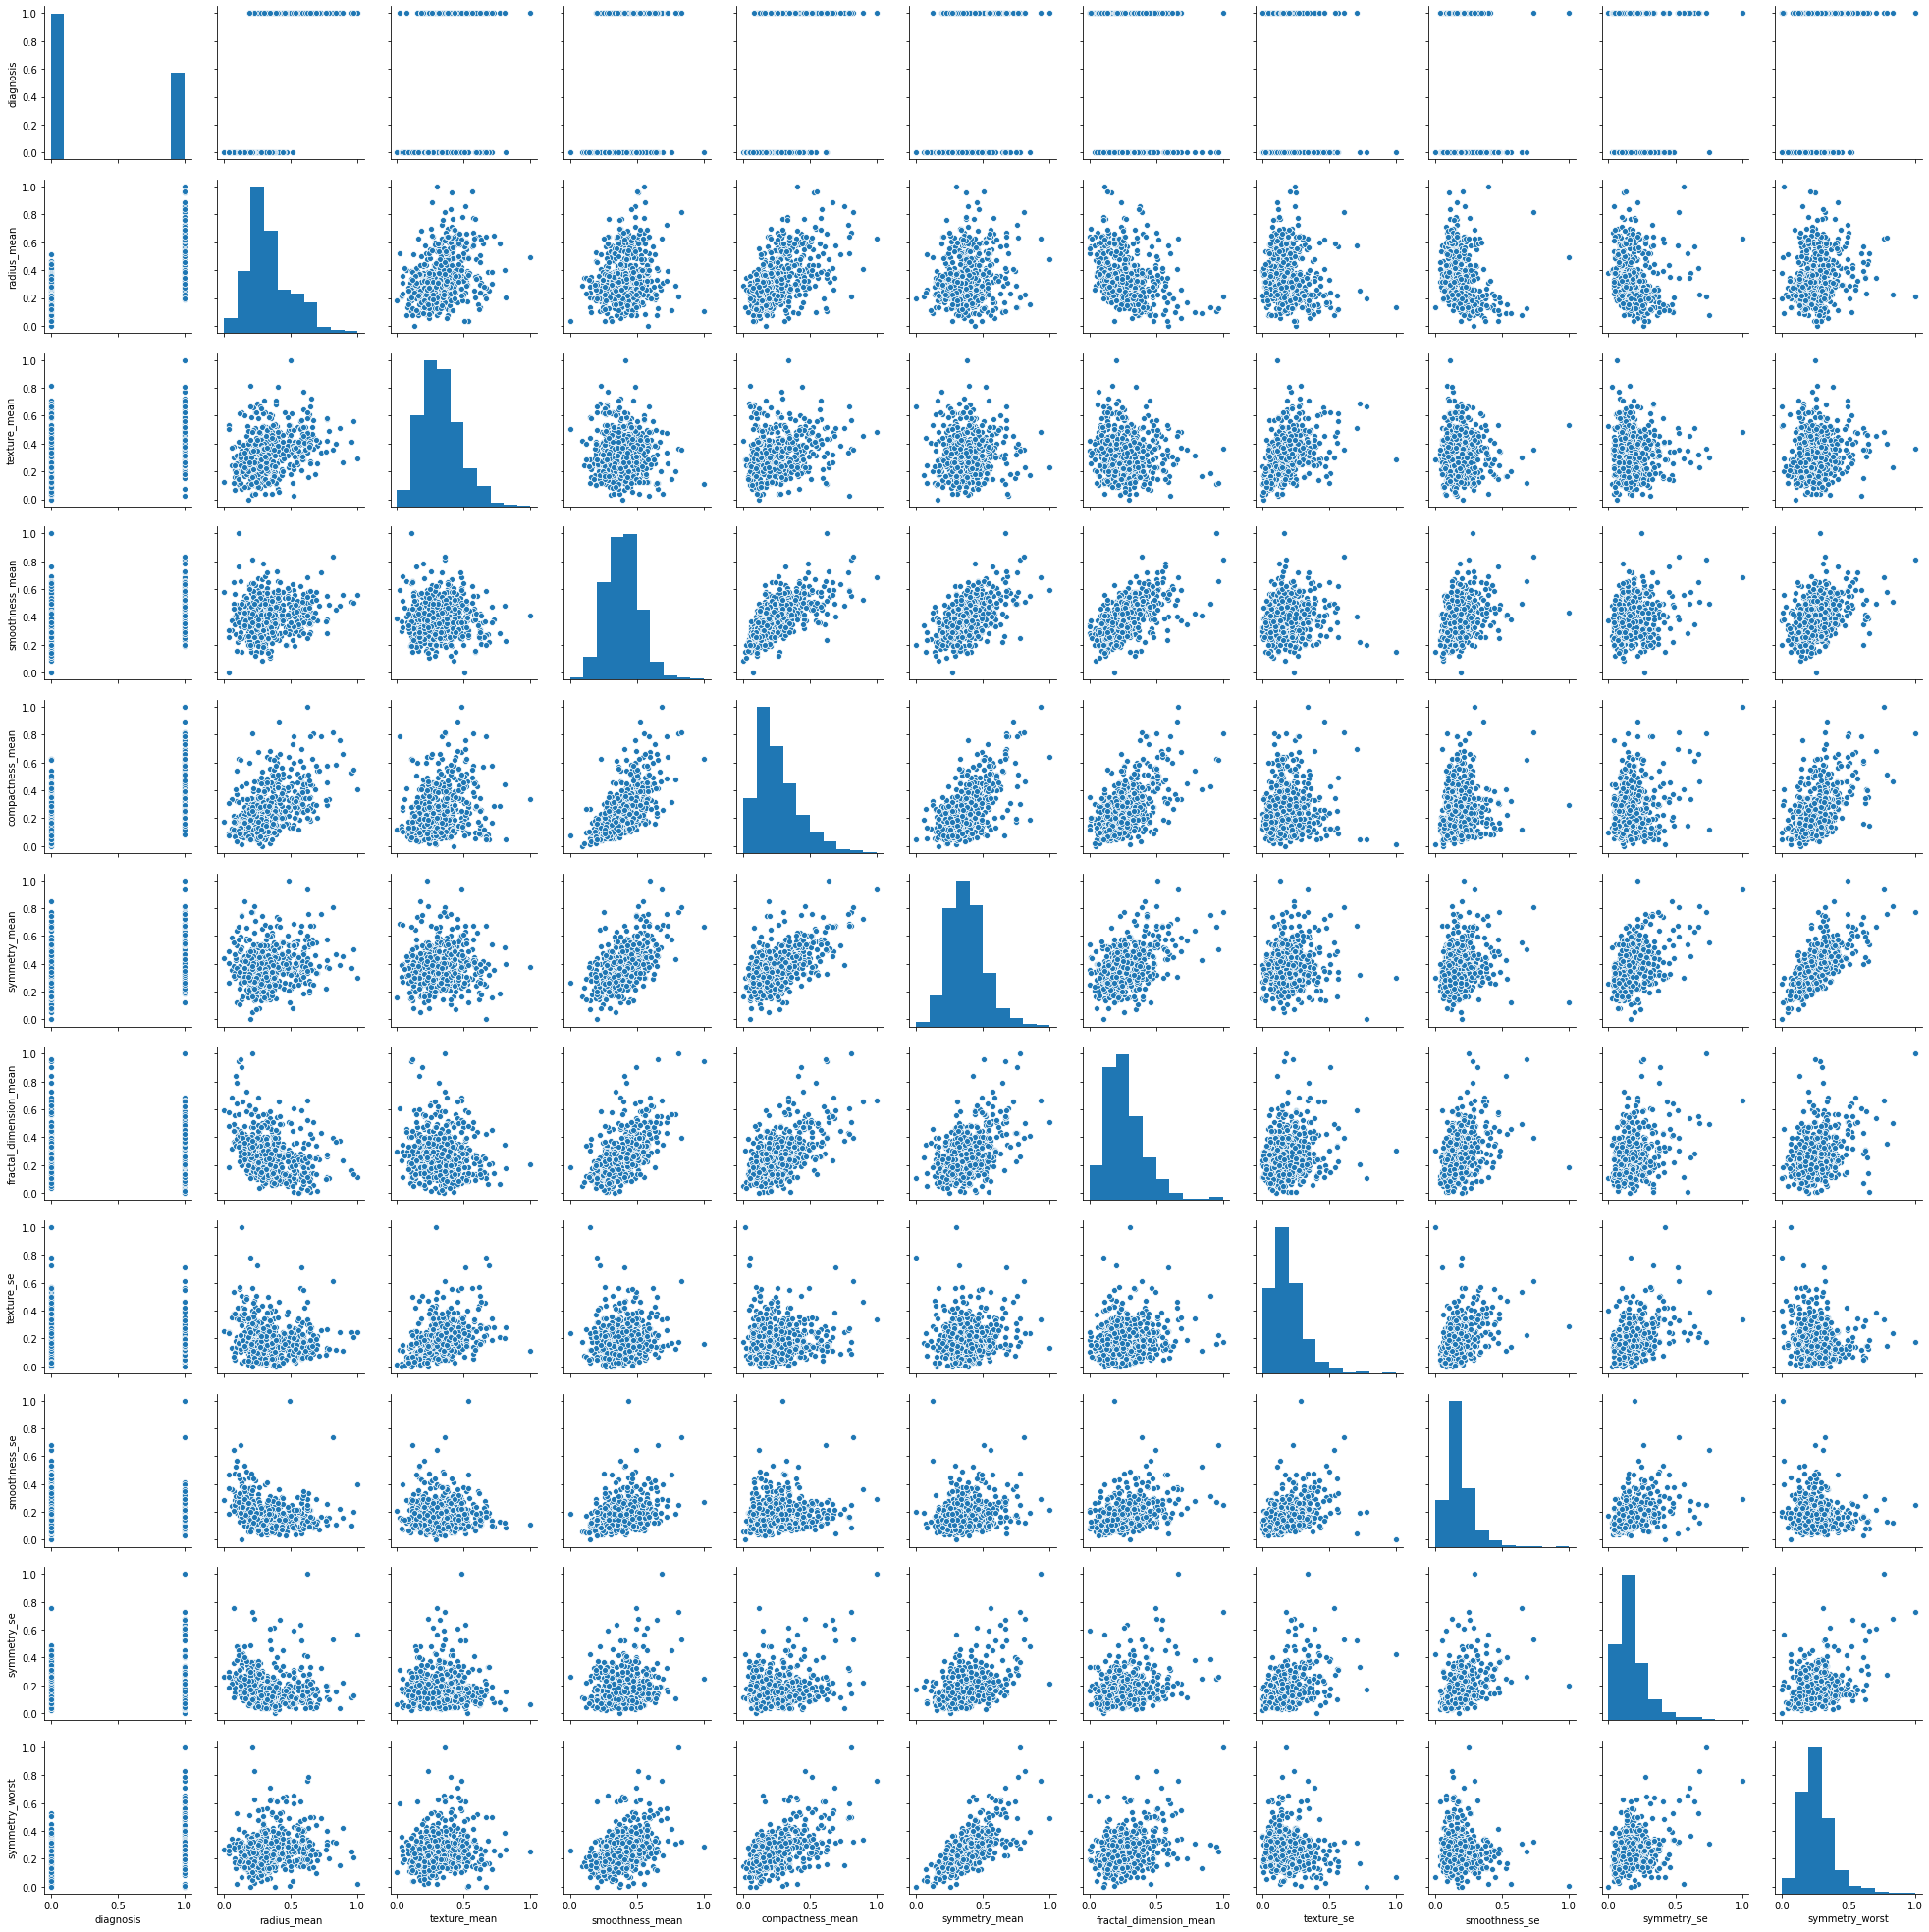

In [7]:
## correlation matrix

plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [32]:
## Calculate the correlation of all the features to their target labels.

corr = df.drop("diagnosis", axis=1).apply(lambda x: x.corr(df.diagnosis))
print(corr)

##Choose the most correlated features above a certain limit for training.
## here I chosse corr over 0.3

corr_high = corr[(corr > 0.3)]
print('\n \n features with corr > 0.3: \n', corr_high)

## Output a list of important feature names.
features =pd.DataFrame(corr_high).index
print(features)

## print Final X data
df_final = df[df.columns.intersection(features)]
print(df_final)

df_label = df['diagnosis']
print(df_label)

radius_mean               0.730029
texture_mean              0.415185
smoothness_mean           0.358560
compactness_mean          0.596534
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
symmetry_worst            0.416294
dtype: float64

 
 features with corr > 0.3: 
 radius_mean         0.730029
texture_mean        0.415185
smoothness_mean     0.358560
compactness_mean    0.596534
symmetry_mean       0.330499
symmetry_worst      0.416294
dtype: float64
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'symmetry_worst'],
      dtype='object')
     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       0.521037      0.022658         0.593753          0.792037   
1       0.643144      0.272574         0.289880          0.181768   
2       0.601496      0.390260         0.514309          0.431017

In [35]:
## Splitting the Data
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

X_train_valid, X_test, y_train_valid, y_test = train_test_split(df_final, df_label, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.125, random_state=0) # 0.125 x 0.8 = 0.1

print(X_train_valid.shape)
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(512, 6)
(57, 6)
(448, 6)
(64, 6)
(57,)
(448,)
(64,)


knn_model accuracy:  0.9473684210526315
rf_model accuracy:  0.9824561403508771
svc_model accuracy:  0.9824561403508771


/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


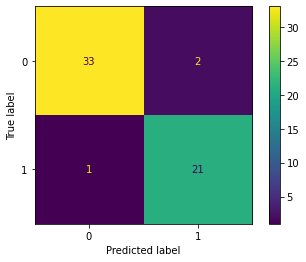

/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


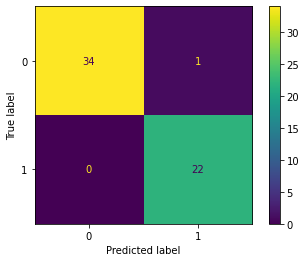

/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


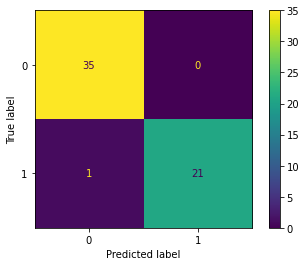

In [49]:
## Training Classifiers  ## Reduced features dataset
## KNN classifier, random forest classifier, and support vector classifier (SVC) 

knn_model=KNeighborsClassifier(n_neighbors=3)
rf_model= RandomForestClassifier(criterion = "entropy", n_estimators =100)
svc_model=SVC(C=1.0, kernel = 'linear', gamma = 'auto')

knn_model.fit(X_train_valid, y_train_valid)
knn_pred = knn_model.predict(X_test)
rf_model.fit(X_train_valid, y_train_valid)
rf_pred = rf_model.predict(X_test)
svc_model.fit(X_train_valid, y_train_valid)
svc_pred = svc_model.predict(X_test)
print('knn_model accuracy: ', knn_model.score(X_test, y_test))
print('rf_model accuracy: ', rf_model.score(X_test, y_test))
print('svc_model accuracy: ', svc_model.score(X_test, y_test))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score

confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix_knn, knn_model.classes_).plot()
plt.show()


confusion_matrix_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix_rf, rf_model.classes_).plot()
plt.show()


confusion_matrix_svc = confusion_matrix(y_test, svc_pred)
disp_svc = ConfusionMatrixDisplay(confusion_matrix_svc, svc_model.classes_).plot()
plt.show()

In [51]:
## Training Classifiers  ## all features
df_X = df.drop(columns = 'diagnosis', axis=1)
df_Y = df['diagnosis']

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

X_train_valid, X_test, y_train_valid, y_test = train_test_split(df_X, df_Y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.125, random_state=0) # 0.125 x 0.8 = 0.1

print(X_train_valid.shape)
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(512, 10)
(57, 10)
(448, 10)
(64, 10)
(57,)
(448,)
(64,)


knn_model accuracy:  0.9298245614035088
rf_model accuracy:  0.9824561403508771
svc_model accuracy:  0.9824561403508771


/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


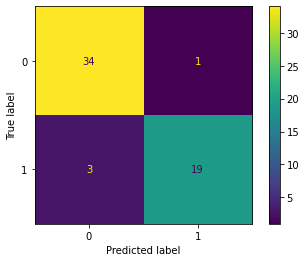

/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


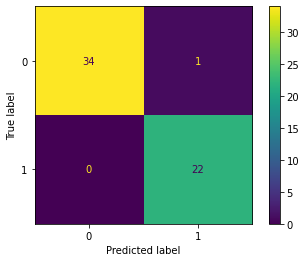

/Users/kirannarta/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


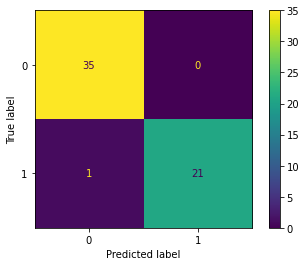

In [52]:
knn_model=KNeighborsClassifier(n_neighbors=3)
rf_model= RandomForestClassifier(criterion = "entropy", n_estimators =100)
svc_model=SVC(C=1.0, kernel = 'linear', gamma = 'auto')

knn_model.fit(X_train_valid, y_train_valid)
knn_pred = knn_model.predict(X_test)
rf_model.fit(X_train_valid, y_train_valid)
rf_pred = rf_model.predict(X_test)
svc_model.fit(X_train_valid, y_train_valid)
svc_pred = svc_model.predict(X_test)
print('knn_model accuracy: ', knn_model.score(X_test, y_test))
print('rf_model accuracy: ', rf_model.score(X_test, y_test))
print('svc_model accuracy: ', svc_model.score(X_test, y_test))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score

confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix_knn, knn_model.classes_).plot()
plt.show()


confusion_matrix_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix_rf, rf_model.classes_).plot()
plt.show()


confusion_matrix_svc = confusion_matrix(y_test, svc_pred)
disp_svc = ConfusionMatrixDisplay(confusion_matrix_svc, svc_model.classes_).plot()
plt.show()

# Conclusion
The reduced features gave a higher accuracy (0.947) in KNN model as comared to all features (0.929). This means it was useful to decraese the feature numbers. Also of note is that the scores remained unchanged in random forest and SVC models. We may be able to see a difference in these models if number of samples were increased.  

### Reduced Features Accuracy score:

knn_model accuracy:  0.9473684210526315

rf_model accuracy:  0.9824561403508771

svc_model accuracy:  0.9824561403508771

### All features accuracy scores:

knn_model accuracy:  0.9298245614035088

rf_model accuracy:  0.9824561403508771

svc_model accuracy:  0.9824561403508771